## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

## Read in Data

In [2]:
shelter = pd.read_csv('../../Final-Project/Data/shelter.csv')
pd.set_option('display.max_columns', None)
shelter.head()

,id,intakereason,breedname,speciesname,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup,movementMonth,movementDay,movementYear,intakeMonth,intakeDay,intakeYear
0,15801,Moving,Domestic Short Hair,Cat,Female,Adoption,11/28/2009,05/13/2017,Senior,Senior,5,13,2017,11,28,2009
1,15932,Moving,German Shepherd Dog/Mix,Dog,Male,Adoption,12/08/2009,04/24/2017,Mature,Senior,4,24,2017,12,8,2009
2,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Adoption,08/10/2012,04/15/2017,Mature,Mature,4,15,2017,8,10,2012
3,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Reclaimed,08/10/2012,02/29/2020,Mature,Mature,2,29,2020,8,10,2012
4,30812,Abandoned,Domestic Short Hair,Cat,Female,Foster,01/11/2013,04/18/2017,Mature,Senior,4,18,2017,1,11,2013


## Goal: Predict Adoptions for Dogs Only
### Data Wrangling
#### Check all age groups

In [3]:
shelter.DogAgeGroup.value_counts()

Adult         7672
Adolescent    6388
Mature        1394
Puppy         1077
Senior         793
Geriatric      740
Name: DogAgeGroup, dtype: int64

In [4]:
# Recode movement months to full month name
def movementMonth (series):
    if series == 1:
        return "January"
    if series == 2:
        return "February"
    if series == 3:
        return "March"
    if series == 4:
        return "April"
    if series == 5:
        return "May"
    if series == 6:
        return "June"
    if series == 7:
        return "July"
    if series == 8:
        return "August"
    if series == 9:
        return "September"
    if series == 10:
        return "October"
    if series == 11:
        return "November"
    if series == 12:
        return "December"
shelter['Month'] = shelter['movementMonth'].apply(movementMonth)

In [5]:
# Recode sex
def sexname (series):
    if series == "Female":
        return "0"
    if series == "Male":
        return "1"
shelter['sexnameR'] = shelter['sexname'].apply(sexname)

In [6]:
# Recode adopted or not
def movementtype (series):
    if series == "Adoption":
        return 1
    else:
        return 0
shelter['movementtypeR'] = shelter['movementtype'].apply(movementtype)

In [7]:
shelter.head()

,id,intakereason,breedname,speciesname,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup,movementMonth,movementDay,movementYear,intakeMonth,intakeDay,intakeYear,Month,sexnameR,movementtypeR
0,15801,Moving,Domestic Short Hair,Cat,Female,Adoption,11/28/2009,05/13/2017,Senior,Senior,5,13,2017,11,28,2009,May,0,1
1,15932,Moving,German Shepherd Dog/Mix,Dog,Male,Adoption,12/08/2009,04/24/2017,Mature,Senior,4,24,2017,12,8,2009,April,1,1
2,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Adoption,08/10/2012,04/15/2017,Mature,Mature,4,15,2017,8,10,2012,April,0,1
3,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Reclaimed,08/10/2012,02/29/2020,Mature,Mature,2,29,2020,8,10,2012,February,0,0
4,30812,Abandoned,Domestic Short Hair,Cat,Female,Foster,01/11/2013,04/18/2017,Mature,Senior,4,18,2017,1,11,2013,April,0,0


In [9]:
# Recode months into columns
dummy_months = pd.get_dummies(shelter['Month'])
dummy_months

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18059,0,0,0,0,1,0,0,0,0,0,0,0
18060,0,0,0,0,1,0,0,0,0,0,0,0
18061,0,0,0,0,1,0,0,0,0,0,0,0
18062,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
# Recode dog age groups into columns
dummy_dogAges = pd.get_dummies(shelter['DogAgeGroup'])
dummy_dogAges

,Adolescent,Adult,Geriatric,Mature,Puppy,Senior
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
18059,0,0,1,0,0,0
18060,0,0,1,0,0,0
18061,0,0,1,0,0,0
18062,0,1,0,0,0,0


In [11]:
# Combine recoded values with original data
shelter1 = pd.concat([shelter, dummy_months, dummy_dogAges], axis = 1)

In [12]:
shelter1.head()

,id,intakereason,breedname,speciesname,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup,movementMonth,movementDay,movementYear,intakeMonth,intakeDay,intakeYear,Month,sexnameR,movementtypeR,April,August,December,February,January,July,June,March,May,November,October,September,Adolescent,Adult,Geriatric,Mature,Puppy,Senior
0,15801,Moving,Domestic Short Hair,Cat,Female,Adoption,11/28/2009,05/13/2017,Senior,Senior,5,13,2017,11,28,2009,May,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,15932,Moving,German Shepherd Dog/Mix,Dog,Male,Adoption,12/08/2009,04/24/2017,Mature,Senior,4,24,2017,12,8,2009,April,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Adoption,08/10/2012,04/15/2017,Mature,Mature,4,15,2017,8,10,2012,April,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Reclaimed,08/10/2012,02/29/2020,Mature,Mature,2,29,2020,8,10,2012,February,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,30812,Abandoned,Domestic Short Hair,Cat,Female,Foster,01/11/2013,04/18/2017,Mature,Senior,4,18,2017,1,11,2013,April,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
# Create dogs only data frame
Dog = shelter1[shelter1.speciesname == 'Dog']
Dog.head()

,id,intakereason,breedname,speciesname,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup,movementMonth,movementDay,movementYear,intakeMonth,intakeDay,intakeYear,Month,sexnameR,movementtypeR,April,August,December,February,January,July,June,March,May,November,October,September,Adolescent,Adult,Geriatric,Mature,Puppy,Senior
1,15932,Moving,German Shepherd Dog/Mix,Dog,Male,Adoption,12/08/2009,04/24/2017,Mature,Senior,4,24,2017,12,8,2009,April,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Adoption,08/10/2012,04/15/2017,Mature,Mature,4,15,2017,8,10,2012,April,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Reclaimed,08/10/2012,02/29/2020,Mature,Mature,2,29,2020,8,10,2012,February,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,31469,Incompatible with owner lifestyle,Basenji/Mix,Dog,Female,Adoption,03/26/2013,03/30/2013,Mature,Mature,3,30,2013,3,26,2013,March,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7,31469,Incompatible with owner lifestyle,Basenji/Mix,Dog,Female,Adoption,03/26/2013,05/09/2017,Mature,Mature,5,9,2017,3,26,2013,May,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [14]:
# Check number of rows and columns
Dog.shape

(6609, 37)

In [15]:
# Define target
y = Dog['movementtypeR']

In [16]:
# Define predictors
x = Dog.drop(columns=['id', 'intakereason', 'breedname', 'speciesname', 'sexname', 'movementtype', 'intakeDate', 
                      'movementDate', 'CatAgeGroup', 'DogAgeGroup', 'movementMonth', 'movementDay', 'movementYear', 
                      'intakeMonth', 'intakeDay','intakeYear', 'Month', 'movementtypeR'])

In [17]:
x.columns = x.columns.astype(str)

In [18]:
x.head()

,sexnameR,April,August,December,February,January,July,June,March,May,November,October,September,Adolescent,Adult,Geriatric,Mature,Puppy,Senior
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [19]:
# Train test split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Decision Tree

In [20]:
# Create intial decision tree
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [21]:
# Make predictions
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test,treePredictions))
print(classification_report (y_test,treePredictions))

[[358 504]
 [297 824]]
              precision    recall  f1-score   support

           0       0.55      0.42      0.47       862
           1       0.62      0.74      0.67      1121

    accuracy                           0.60      1983
   macro avg       0.58      0.58      0.57      1983
weighted avg       0.59      0.60      0.59      1983



## 59% weighted avg with a decision tree

## Initial Random Forest Model

In [22]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

In [23]:
# Evaluate Model Fit
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[330 532]
 [271 850]]
              precision    recall  f1-score   support

           0       0.55      0.38      0.45       862
           1       0.62      0.76      0.68      1121

    accuracy                           0.60      1983
   macro avg       0.58      0.57      0.57      1983
weighted avg       0.59      0.60      0.58      1983



## 59% weighted avg - same as decision tree

## Hyperparameter Tuning

In [24]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.578416540595058
4 : 0.5935451336359052
5 : 0.5940494200706001
8 : 0.5940494200706001
10 : 0.5980837115481593
20 : 0.5975794251134644
50 : 0.5980837115481593
75 : 0.5915279878971256
100 : 0.59505799293999
250 : 0.5965708522440747
500 : 0.59505799293999


## 50 trees had the best accuracy

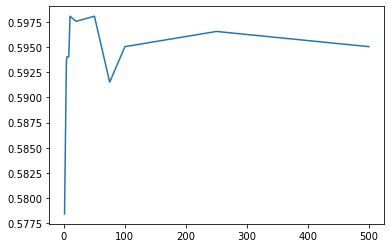

In [25]:
plt.plot(n_estimators_array, results)

## Tuning the Remaining Three Parameters

In [26]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [27]:
# Initialize one random forest for every hyperparameter
rf = RandomForestClassifier(n_estimators=50)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [28]:
# Run all fit
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [29]:
# Find best fit
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}

In [30]:
# Use best fit
forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=4, max_features='log2', max_depth=10)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       n_estimators=50)

In [31]:
# Run forest predictions
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[306 556]
 [231 890]]
              precision    recall  f1-score   support

           0       0.57      0.35      0.44       862
           1       0.62      0.79      0.69      1121

    accuracy                           0.60      1983
   macro avg       0.59      0.57      0.57      1983
weighted avg       0.60      0.60      0.58      1983



### Overall weighted avg precision increased to 60% (+1%).

## Feature Importance

In [32]:
# How important each of the feature is as a predictor
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

Geriatric     0.216285
Adolescent    0.144295
sexnameR      0.113589
Adult         0.074516
Senior        0.072791
Mature        0.050654
February      0.040658
April         0.036663
November      0.034826
March         0.027527
January       0.027267
July          0.025403
Puppy         0.024410
September     0.021585
December      0.019923
June          0.019605
August        0.018261
May           0.017432
October       0.014310
dtype: float64


<AxesSubplot:>

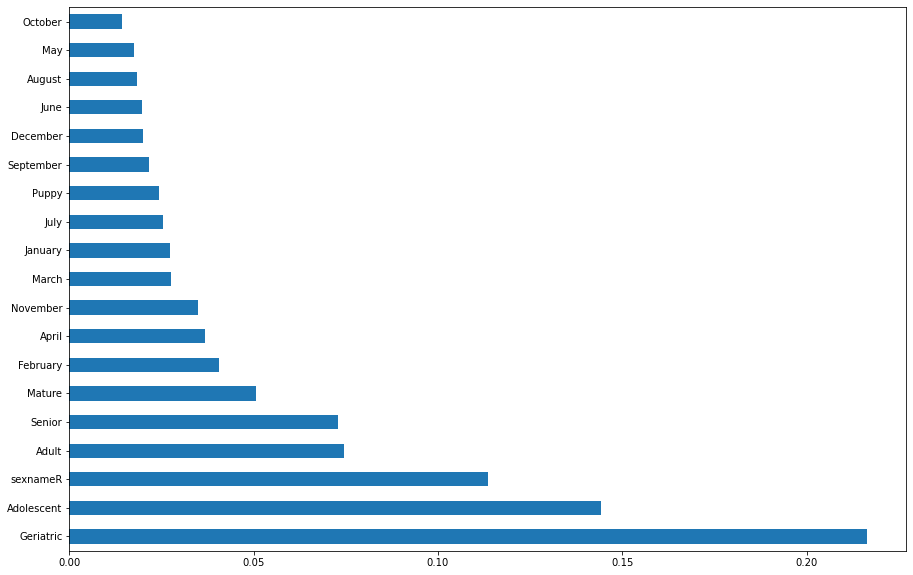

In [33]:
feature_importances.plot(kind='barh', figsize=(15,10))

## The Geriatric dog age was the top feature that influenced predictions.